# Gibbs sampling

*PoHsiang Peng, Jinjie Zhang*

## Problem 1

First we need to know how to draw samples from $p(x|y)$ given $y$. Note that
If $p(x|\lambda)\propto\lambda e^{-\lambda x}$ for $0<x<\alpha$, then we have

$$F(x)=\frac{1-e^{-\lambda x}}{1-e^{-\lambda \alpha}}$$
Thus, we can draw samples from $p(x|y)$ given $y$ by
$$x_i=-\frac{1}{\lambda}\log[1-u_i(1-e^{-\lambda \alpha})]$$
where $u_i$ is the uniform random number. This is exactly the same as drawing samples from $p(y|x)$ given $x$, because of symmetry.

Now we are ready to implement Gibbs sampling. At first, we need to assign initial values. Here, $x_0=1$ and $y_0=1$ will be used. Then, repeat the following
  1. Draw $x_i$ from $p(x|y_{i-1})$
  2. Draw $y_i$ from $p(y|x_i)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def draw(theta,a):
    """
    Draw samples from $p(x|theta)$ for $0<x<a$
    """
    u = np.random.uniform(0,1)
    return(-(1/theta)*np.log(1-u*(1-np.exp(-theta*a))))

def Gibbs(initial,n,B,seed=123):
    """
    @initial: initial value for Gibbs sampling
    @n: number of samples
    @B: bound for truncated exponential dist'n
    """
    np.random.seed(seed)
    samples = np.zeros([n,2])
    samples[0,0] = initial[0]
    samples[0,1] = initial[1]
    
    for i in range(1,n):
        samples[i,0] = draw(samples[i-1,1],B)
        samples[i,1] = draw(samples[i,0],B)
    
    return(samples)

## Problem 2

In [2]:
samples1 = Gibbs(np.array([1,1]),500,5)
samples2 = Gibbs(np.array([1,1]),5000,5)
samples3 = Gibbs(np.array([1,1]),50000,5)

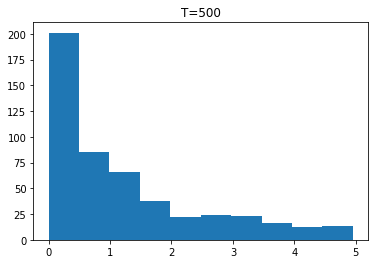

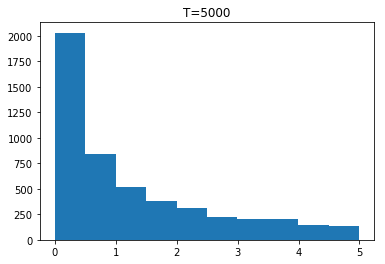

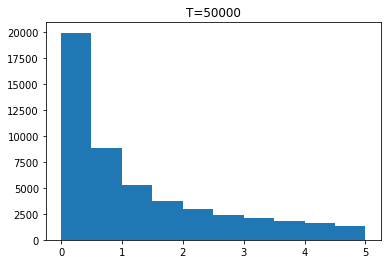

In [3]:
plt.figure(1)
plt.hist(samples1[:,0])
plt.title('T=500')

plt.figure(2)
plt.hist(samples2[:,0])
plt.title('T=5000')

plt.figure(3)
plt.hist(samples3[:,0])
plt.title('T=50000')
plt.show()

## Problem 3

Since the samples $(x_i,y_i)$ follows the point distribution $p(x,y)$, we can approximate $\text{E}[X]$ as
$$\text{E}[X]\approx\frac{1}{n}\sum_{i=1}^nx_i$$

In [4]:
mean1 = np.mean(samples1[:,0])
mean2 = np.mean(samples2[:,0])
mean3 = np.mean(samples3[:,0])
print('T = 500:   E[X] = %.4f\nT = 5000:  E[X] = %.4f\nT = 50000: E[X] = %.4f'%(mean1,mean2,mean3))

T = 500:   E[X] = 1.2201
T = 5000:  E[X] = 1.2690
T = 50000: E[X] = 1.2720
